In [73]:
from pprint import pprint
from sympy import *
from numpy import diag, diagflat, dot
import numpy as np

u = 1.5
L = 16
deltaX = (L/(L-1))
print("DeltaX: ", deltaX)
deltaT = deltaX/u
print("DeltaT: ", deltaT, "\n")
Ci = 1/1000
Ce = 1.2
nos_internos = L-2
t = 0
tmax = 3.6
iteracoes = 0
vetorC_antigo = []

for p in range(L):
    vetorC_antigo.append(Ci)

def espaço_interno(nos_interior):
    return L / (nos_interior+1)

vetor_comprimento = [0]
    # vetor_Ci = [Ci]
for z in range(nos_internos+1):
    vetor_comprimento.append(vetor_comprimento[z] + (espaço_interno(nos_internos)))
    # vetor_Ci.append(Ci)
    z += 1
    
def calculaVetorC(u, deltaT, deltaX, vetor_comprimento, vetorC_antigo):

    vetorC_novo = []
    for p in range(L):
        if(p == 0):
            vetorC_novo.append(Ce)
        else:
            Cnovo = (1-((u*deltaT)/deltaX))*vetorC_antigo[p] + ((u*deltaT)/deltaX)*vetorC_antigo[p-1]
            vetorC_novo.append(Cnovo)

    print("CNOVO: ", vetorC_novo)
    
    return vetorC_novo






DeltaX:  1.0666666666666667
DeltaT:  0.7111111111111111 



CNOVO:  [1.2, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
CNOVO:  [1.2, 1.2, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
CNOVO:  [1.2, 1.2, 1.2, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
CNOVO:  [1.2, 1.2, 1.2, 1.2, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
CNOVO:  [1.2, 1.2, 1.2, 1.2, 1.2, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]


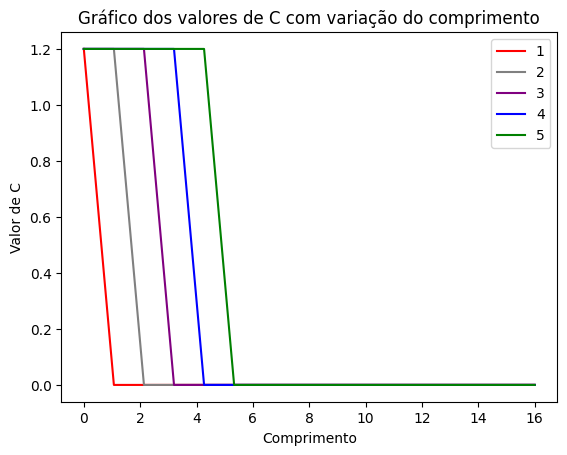

Vetor Antigo:  [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]


In [74]:
import matplotlib.pyplot as plt

def grafico_PVC(vetorC_antigo):

    plt.title("Gráfico dos valores de C com variação do comprimento")
    # plt.plot(labelx, vetor_Ci, color="black", label="Ci")
    cor = ["red", "grey", "purple", "blue", "green"]

    for i in range(5):    
        vetorC_antigo = calculaVetorC(u, deltaT, deltaX, vetor_comprimento, vetorC_antigo)
        plt.plot(vetor_comprimento, vetorC_antigo, color=cor[i], label=i+1)

    plt.legend()
    plt.xlabel("Comprimento")
    plt.ylabel("Valor de C")
    plt.show()

grafico_PVC(vetorC_antigo)
print("Vetor Antigo: ", vetorC_antigo)

vetor vetor deltaT: [0.7111111111111111, 1.4222222222222223, 2.8444444444444446, 5.688888888888889, 11.377777777777778]

Resultados para nos internos = 0.7111111111111111


NameError: name 'sistema_pvc' is not defined

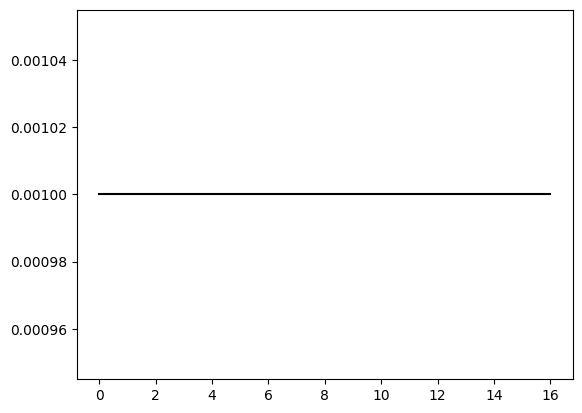

In [75]:
def refinamento():
    vetor_deltaT = [deltaT]

    for i in range(0, 4):
        vetor_deltaT.append(vetor_deltaT[i]*2)

    print("vetor vetor deltaT:", vetor_deltaT)
    
    plt.plot(vetor_comprimento, vetor_Ci, color="black", label="Ci")

    for i in range(0, 5):
        cor = ["red", "grey", "purple", "blue", "green"]
        print("\nResultados para nos internos = {}".format(vetor_deltaT[i]))
        resultados_PVC = sistema_pvc(nos_internos, u, vetor_deltaT[i], deltaX)
        plt.plot(
            vetor_comprimento, resultados_PVC, color=cor[i], label=round(vetor_deltaT[i], 2)
        )
        plt.legend(title="deltaT")
        plt.xlabel("Comprimento")
        plt.ylabel("Valor de C")

    plt.title("Gráfico refinamento para aumento de deltaT")
    plt.show()


refinamento()
